In [1]:
from tools import *
from random import shuffle
import networkx as nx
import random
from collections import Counter

In [2]:
theta=0.5 # parameter in clustering algorithm conditions
n_max=10 #maximum amount of clusters
n_min=5 #minimum amount of clusters
d_max=3 #maximum cluster size

N=20 #router number
m=3 #shortest path number
sim_num=1
memsize=10000 #in mb
min_vert_degree=2 #min vertex degree
router_rate_reduction=[0.2,0.5] #router max data rate reduction range in comparisson with the maximum demand from the links
router_delay_coefficient=8 #defines delay time while the package passing through router
link_delay_coefficient=4 #defines delay time while the package passing through link

file_name_full_graph='full_graph_{}_{}.txt'.format(N,sim_num)
file_network='network_{}_{}.txt'.format(N,sim_num)

In [3]:
T=2
p=2
nmax=5
mmin=2

# Reading graph from a file

In [4]:
N, con, edges = ReadGraph(file_name_full_graph)

In [5]:
print('connectivity list', con[1:])

connectivity list [[(2, 5.166666666666667e-05), (4, 7.999999999999999e-05), (8, 0.00010666666666666667)], [(1, 6.476190476190476e-05), (5, 5.2000000000000004e-05), (12, 0.0002), (14, 9.333333333333334e-05), (18, 4.617886178861789e-05)], [(5, 5.2000000000000004e-05), (10, 7.076923076923078e-05)], [(1, 6.476190476190476e-05), (7, 9.333333333333334e-05), (16, 0.00010153846153846153), (18, 5.9512195121951225e-05)], [(2, 4.5e-05), (3, 8.153846153846153e-05), (10, 5.7435897435897434e-05), (19, 0.00012000000000000002)], [(12, 0.0001866666666666667)], [(4, 9.333333333333334e-05), (9, 0.00024), (11, 7.333333333333334e-05), (18, 5.9512195121951225e-05)], [(1, 6.476190476190476e-05), (18, 3.951219512195122e-05)], [(7, 9.333333333333334e-05), (18, 5.9512195121951225e-05)], [(3, 0.00010153846153846153), (5, 5.8666666666666665e-05), (11, 7.333333333333334e-05), (15, 9.714285714285714e-05), (17, 8.210526315789474e-05)], [(7, 9.333333333333334e-05), (10, 7.076923076923078e-05), (14, 0.0001066666666666

In [6]:
print('graph edges',edges)

graph edges [(1, 2, 5.166666666666667e-05), (2, 1, 6.476190476190476e-05), (1, 4, 7.999999999999999e-05), (4, 1, 6.476190476190476e-05), (1, 8, 0.00010666666666666667), (8, 1, 6.476190476190476e-05), (2, 5, 5.2000000000000004e-05), (5, 2, 4.5e-05), (2, 12, 0.0002), (12, 2, 6.500000000000001e-05), (2, 14, 9.333333333333334e-05), (14, 2, 5.166666666666667e-05), (2, 18, 4.617886178861789e-05), (18, 2, 5.166666666666667e-05), (3, 5, 5.2000000000000004e-05), (5, 3, 8.153846153846153e-05), (3, 10, 7.076923076923078e-05), (10, 3, 0.00010153846153846153), (4, 7, 9.333333333333334e-05), (7, 4, 9.333333333333334e-05), (4, 16, 0.00010153846153846153), (16, 4, 9.333333333333334e-05), (4, 18, 5.9512195121951225e-05), (18, 4, 9.333333333333334e-05), (5, 10, 5.7435897435897434e-05), (10, 5, 5.8666666666666665e-05), (5, 19, 0.00012000000000000002), (19, 5, 7.2e-05), (6, 12, 0.0001866666666666667), (12, 6, 0.0001866666666666667), (7, 9, 0.00024), (9, 7, 9.333333333333334e-05), (7, 11, 7.333333333333334

# Reading network from a file

In [7]:
router_data_rate, con_U, U = ReadNetwork(file_network)

In [8]:
print('Router data rates', router_data_rate)

Router data rates [210000.0, 320000.0, 130000.0, 150000.0, 250000.0, 50000.0, 150000.0, 100000.0, 40000.0, 260000.0, 240000.0, 50000.0, 200000.0, 120000.0, 140000.0, 130000.0, 190000.0, 410000.0, 100000.0, 20000.0]


In [9]:
print('Link capacity connectivity list', con_U[1:])

Link capacity connectivity list [[(2, 150000.0), (4, 150000.0), (8, 150000.0)], [(1, 150000.0), (5, 200000.0), (12, 100000.0), (14, 150000.0), (18, 150000.0)], [(5, 200000.0), (10, 100000.0)], [(1, 150000.0), (7, 100000.0), (16, 100000.0), (18, 100000.0)], [(2, 200000.0), (3, 200000.0), (10, 150000.0), (19, 100000.0)], [(12, 150000.0)], [(4, 100000.0), (9, 100000.0), (11, 100000.0), (18, 100000.0)], [(1, 150000.0), (18, 200000.0)], [(7, 100000.0), (18, 100000.0)], [(3, 100000.0), (5, 150000.0), (11, 100000.0), (15, 100000.0), (17, 100000.0)], [(7, 100000.0), (10, 100000.0), (14, 100000.0), (15, 200000.0), (18, 200000.0), (19, 200000.0)], [(2, 100000.0), (6, 150000.0)], [(15, 100000.0), (16, 150000.0), (17, 100000.0), (19, 200000.0)], [(2, 150000.0), (11, 100000.0), (15, 200000.0)], [(10, 100000.0), (11, 200000.0), (13, 100000.0), (14, 200000.0)], [(4, 100000.0), (13, 150000.0), (17, 150000.0)], [(10, 100000.0), (13, 100000.0), (16, 150000.0), (20, 100000.0)], [(2, 150000.0), (4, 100000

In [10]:
print('Link capacity edges', U)

Link capacity edges [(1, 2, 150000.0), (2, 1, 150000.0), (1, 4, 150000.0), (4, 1, 150000.0), (1, 8, 150000.0), (8, 1, 150000.0), (2, 5, 200000.0), (5, 2, 200000.0), (2, 12, 100000.0), (12, 2, 100000.0), (2, 14, 150000.0), (14, 2, 150000.0), (2, 18, 150000.0), (18, 2, 150000.0), (3, 5, 200000.0), (5, 3, 200000.0), (3, 10, 100000.0), (10, 3, 100000.0), (4, 7, 100000.0), (7, 4, 100000.0), (4, 16, 100000.0), (16, 4, 100000.0), (4, 18, 100000.0), (18, 4, 100000.0), (5, 10, 150000.0), (10, 5, 150000.0), (5, 19, 100000.0), (19, 5, 100000.0), (6, 12, 150000.0), (12, 6, 150000.0), (7, 9, 100000.0), (9, 7, 100000.0), (7, 11, 100000.0), (11, 7, 100000.0), (7, 18, 100000.0), (18, 7, 100000.0), (8, 18, 200000.0), (18, 8, 200000.0), (9, 18, 100000.0), (18, 9, 100000.0), (10, 11, 100000.0), (11, 10, 100000.0), (10, 15, 100000.0), (15, 10, 100000.0), (10, 17, 100000.0), (17, 10, 100000.0), (11, 14, 100000.0), (14, 11, 100000.0), (11, 15, 200000.0), (15, 11, 200000.0), (11, 18, 200000.0), (18, 11, 2000

# Step 1. Tree removal

In [11]:
def TreeRemoval(con, N):
    deg=[len(con[i]) for i in range(N+1)]
    con_temp=[set([i for i,_ in con[v]]) for v in range(N+1)]
    con_tree=[[] for _ in range(N+1)]
    
    Queue=[v for v in range(1,N+1) if deg[v]==1] #initialize Queue with leafs
    
    Heads=[]
    
    while Queue:
        
        v=Queue.pop(0)

        if deg[v]>1:
            Heads.append(v)
        else:
            w=con_temp[v].pop() #parent of v
            con_temp[w].remove(v) #edge removal
            con_tree[w].append(v) #edge inclusion

            deg[w]-=1 #degree decreasing 

            Queue.append(w) #adding w to Queue
            
    return set(Heads), con_tree

In [12]:
def dfs(x, head): #Depth-first search 
    
    for v in con_tree[x]:
        trees[head].append(v) #adding vertex to the tree
        dfs(v, head)  

In [13]:
label=[0]*(N+1)
Heads, con_tree=TreeRemoval(con, N)

trees={h:[] for h in Heads}

for i in trees:    
    trees[i].append(i)
    dfs(i,i) # looking for all the tree vertices

In [14]:
print('Tree heads', Heads)

Tree heads {17, 2}


In [15]:
print('Whole trees',trees)

Whole trees {17: [17, 20], 2: [2, 12, 6]}


# New graph without trees

In [16]:
import numpy as np

In [17]:
all_trees=np.sum([trees[v] for v in trees])

C:\Users\79022\anaconda3\envs\envv\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [18]:
all_trees

[17, 20, 2, 12, 6]

In [19]:
l=len(all_trees)

In [20]:
print('Size of all trees combined', l)

Size of all trees combined 5


In [21]:
N_new=N-l+len(trees)

In [22]:
N_new

17

In [23]:
conversion_old_2_new=[0]*(N+1)
conversion_new_2_old=[0]*(N_new+1)

In [24]:
cnt=1

for v in trees:
    for w in trees[v]:
        conversion_old_2_new[w]=cnt
        conversion_new_2_old[cnt]=w
        
    cnt+=1
print(conversion_old_2_new)
for i in range(1,N+1):
    if conversion_old_2_new[i]==0:
        conversion_old_2_new[i]=cnt
        conversion_new_2_old[cnt]=i
        cnt+=1
    

[0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1]


In [25]:
conversion_old_2_new

[0, 3, 2, 4, 5, 6, 2, 7, 8, 9, 10, 11, 2, 12, 13, 14, 15, 1, 16, 17, 1]

In [26]:
conversion_new_2_old

[0, 20, 6, 1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19]

In [27]:
con_new=[[] for _ in range(N_new+1)]

In [28]:
for i in range(1,N+1):
    
    for e in con[i]:
        x,y=e
        print(i,x,y,conversion_old_2_new[i],conversion_old_2_new[x],y)
        
        if conversion_old_2_new[i]!=conversion_old_2_new[x]:
            con_new[conversion_old_2_new[i]].append((conversion_old_2_new[x],y))

1 2 5.166666666666667e-05 3 2 5.166666666666667e-05
1 4 7.999999999999999e-05 3 5 7.999999999999999e-05
1 8 0.00010666666666666667 3 8 0.00010666666666666667
2 1 6.476190476190476e-05 2 3 6.476190476190476e-05
2 5 5.2000000000000004e-05 2 6 5.2000000000000004e-05
2 12 0.0002 2 2 0.0002
2 14 9.333333333333334e-05 2 13 9.333333333333334e-05
2 18 4.617886178861789e-05 2 16 4.617886178861789e-05
3 5 5.2000000000000004e-05 4 6 5.2000000000000004e-05
3 10 7.076923076923078e-05 4 10 7.076923076923078e-05
4 1 6.476190476190476e-05 5 3 6.476190476190476e-05
4 7 9.333333333333334e-05 5 7 9.333333333333334e-05
4 16 0.00010153846153846153 5 15 0.00010153846153846153
4 18 5.9512195121951225e-05 5 16 5.9512195121951225e-05
5 2 4.5e-05 6 2 4.5e-05
5 3 8.153846153846153e-05 6 4 8.153846153846153e-05
5 10 5.7435897435897434e-05 6 10 5.7435897435897434e-05
5 19 0.00012000000000000002 6 17 0.00012000000000000002
6 12 0.0001866666666666667 2 2 0.0001866666666666667
7 4 9.333333333333334e-05 7 5 9.33333333

In [29]:
con

[[],
 [(2, 5.166666666666667e-05),
  (4, 7.999999999999999e-05),
  (8, 0.00010666666666666667)],
 [(1, 6.476190476190476e-05),
  (5, 5.2000000000000004e-05),
  (12, 0.0002),
  (14, 9.333333333333334e-05),
  (18, 4.617886178861789e-05)],
 [(5, 5.2000000000000004e-05), (10, 7.076923076923078e-05)],
 [(1, 6.476190476190476e-05),
  (7, 9.333333333333334e-05),
  (16, 0.00010153846153846153),
  (18, 5.9512195121951225e-05)],
 [(2, 4.5e-05),
  (3, 8.153846153846153e-05),
  (10, 5.7435897435897434e-05),
  (19, 0.00012000000000000002)],
 [(12, 0.0001866666666666667)],
 [(4, 9.333333333333334e-05),
  (9, 0.00024),
  (11, 7.333333333333334e-05),
  (18, 5.9512195121951225e-05)],
 [(1, 6.476190476190476e-05), (18, 3.951219512195122e-05)],
 [(7, 9.333333333333334e-05), (18, 5.9512195121951225e-05)],
 [(3, 0.00010153846153846153),
  (5, 5.8666666666666665e-05),
  (11, 7.333333333333334e-05),
  (15, 9.714285714285714e-05),
  (17, 8.210526315789474e-05)],
 [(7, 9.333333333333334e-05),
  (10, 7.07692307

In [30]:
con_new

[[],
 [(10, 7.076923076923078e-05), (12, 8e-05), (15, 8.820512820512821e-05)],
 [(3, 6.476190476190476e-05),
  (6, 5.2000000000000004e-05),
  (13, 9.333333333333334e-05),
  (16, 4.617886178861789e-05)],
 [(2, 5.166666666666667e-05),
  (5, 7.999999999999999e-05),
  (8, 0.00010666666666666667)],
 [(6, 5.2000000000000004e-05), (10, 7.076923076923078e-05)],
 [(3, 6.476190476190476e-05),
  (7, 9.333333333333334e-05),
  (15, 0.00010153846153846153),
  (16, 5.9512195121951225e-05)],
 [(2, 4.5e-05),
  (4, 8.153846153846153e-05),
  (10, 5.7435897435897434e-05),
  (17, 0.00012000000000000002)],
 [(5, 9.333333333333334e-05),
  (9, 0.00024),
  (11, 7.333333333333334e-05),
  (16, 5.9512195121951225e-05)],
 [(3, 6.476190476190476e-05), (16, 3.951219512195122e-05)],
 [(7, 9.333333333333334e-05), (16, 5.9512195121951225e-05)],
 [(4, 0.00010153846153846153),
  (6, 5.8666666666666665e-05),
  (11, 7.333333333333334e-05),
  (14, 9.714285714285714e-05),
  (1, 8.210526315789474e-05)],
 [(7, 9.33333333333333

# Drawing new graph

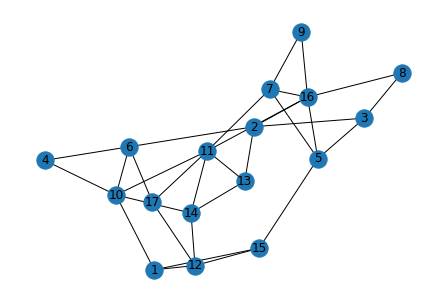

In [31]:
G = nx.Graph()
G.add_nodes_from(range(1,N_new))

for i in range(1,N_new+1):
    for e in con_new[i]:
        x,y=e
        G.add_edge(i,x)

nx.draw(G, with_labels=True)

# Step 2. Depth-first search

In [32]:
vert_seq=[]
label=[0]*(N_new+1)

In [33]:
def dfs_clustering(v):
    vert_seq.append(v)
    
    con_temp_list=[[i] for i in con_new[v]]
    shuffle(con_temp_list)
    
    for e in con_temp_list:
        u,_ = e[0]
        
        if not label[u]:
            label[u]=1
            dfs_clustering(u)
            
            vert_seq.append(v)

In [34]:
dfs_clustering(1) #depth-first search from vertex 1

In [35]:
print('depth-first search tree', vert_seq)

depth-first search tree [1, 12, 15, 5, 7, 9, 16, 2, 3, 8, 3, 2, 6, 17, 11, 14, 10, 1, 10, 4, 10, 14, 13, 14, 11, 17, 6, 2, 16, 9, 7, 5, 15, 12, 1]


In [36]:
print('depth-first search tree length',len(vert_seq))

depth-first search tree length 35


# Step 3. Removing repetitions

In [37]:
def remove_repetitions(vert_seq, N_new):

    vert_seq_copy=vert_seq.copy()
    cnt=Counter(vert_seq_copy)

    removed=0
    l=len(vert_seq_copy)
    pos=random.randint(0,l-1)
    f = random.choice([-1,1])

    while removed<N_new+1:

        if cnt[vert_seq_copy[pos]]>1:
            cnt[vert_seq_copy[pos]]-=1
            vert_seq_copy[pos]=0        
            removed+=1

        pos+=f
        if pos<0:
            pos=l-1

        if pos>l-1:
            pos=0
        
    return vert_seq_copy
        

In [38]:
vert_seq_copy=remove_repetitions(vert_seq, N_new)

In [39]:
print('before', vert_seq)

before [1, 12, 15, 5, 7, 9, 16, 2, 3, 8, 3, 2, 6, 17, 11, 14, 10, 1, 10, 4, 10, 14, 13, 14, 11, 17, 6, 2, 16, 9, 7, 5, 15, 12, 1]


In [40]:
print('after removing repetitions',vert_seq_copy)

after removing repetitions [0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 0, 0, 0, 17, 11, 14, 10, 0, 0, 4, 0, 0, 13, 0, 0, 0, 6, 2, 16, 9, 7, 5, 15, 12, 1]


In [41]:
def clean_zeros(arr):

    ans=[]
    l=len(arr)

    fl=True

    for i in range(0,l):

        if arr[i]!=0:
            fl=True
            ans.append(arr[i])
        else:
            if fl:
                ans.append(0)

            fl=False
            
    if ans[0]==ans[-1]:
        ans.pop(0)
            
    return ans
    

In [42]:
vert_after_cleaning_zeros=clean_zeros(vert_seq_copy)

In [43]:
print('after cleaning zeros', vert_after_cleaning_zeros)

after cleaning zeros [0, 3, 8, 0, 17, 11, 14, 10, 0, 4, 0, 13, 0, 6, 2, 16, 9, 7, 5, 15, 12, 1]


In [44]:
con_new

[[],
 [(10, 7.076923076923078e-05), (12, 8e-05), (15, 8.820512820512821e-05)],
 [(3, 6.476190476190476e-05),
  (6, 5.2000000000000004e-05),
  (13, 9.333333333333334e-05),
  (16, 4.617886178861789e-05)],
 [(2, 5.166666666666667e-05),
  (5, 7.999999999999999e-05),
  (8, 0.00010666666666666667)],
 [(6, 5.2000000000000004e-05), (10, 7.076923076923078e-05)],
 [(3, 6.476190476190476e-05),
  (7, 9.333333333333334e-05),
  (15, 0.00010153846153846153),
  (16, 5.9512195121951225e-05)],
 [(2, 4.5e-05),
  (4, 8.153846153846153e-05),
  (10, 5.7435897435897434e-05),
  (17, 0.00012000000000000002)],
 [(5, 9.333333333333334e-05),
  (9, 0.00024),
  (11, 7.333333333333334e-05),
  (16, 5.9512195121951225e-05)],
 [(3, 6.476190476190476e-05), (16, 3.951219512195122e-05)],
 [(7, 9.333333333333334e-05), (16, 5.9512195121951225e-05)],
 [(4, 0.00010153846153846153),
  (6, 5.8666666666666665e-05),
  (11, 7.333333333333334e-05),
  (14, 9.714285714285714e-05),
  (1, 8.210526315789474e-05)],
 [(7, 9.33333333333333

In [45]:
adj_new=[set([j for j,_ in con_new[i]]) for i in range(len(con_new))]

In [46]:
adj_new

[set(),
 {10, 12, 15},
 {3, 6, 13, 16},
 {2, 5, 8},
 {6, 10},
 {3, 7, 15, 16},
 {2, 4, 10, 17},
 {5, 9, 11, 16},
 {3, 16},
 {7, 16},
 {1, 4, 6, 11, 14},
 {7, 10, 13, 14, 16, 17},
 {1, 14, 15, 17},
 {2, 11, 14},
 {10, 11, 12, 13},
 {1, 5, 12},
 {2, 5, 7, 8, 9, 11},
 {6, 11, 12}]

In [47]:
vert_after_cleaning_zeros

[0, 3, 8, 0, 17, 11, 14, 10, 0, 4, 0, 13, 0, 6, 2, 16, 9, 7, 5, 15, 12, 1]

In [48]:
final_vert=[]
l=len(vert_after_cleaning_zeros)

for i in range(l-1):

    if not vert_after_cleaning_zeros[i] and vert_after_cleaning_zeros[i-1] in adj_new[vert_after_cleaning_zeros[i+1]]:
        continue
        
    final_vert.append(vert_after_cleaning_zeros[i])

In [49]:
print('before final removal',vert_after_cleaning_zeros)

before final removal [0, 3, 8, 0, 17, 11, 14, 10, 0, 4, 0, 13, 0, 6, 2, 16, 9, 7, 5, 15, 12, 1]


In [50]:
print('after removing extra zeros between connected consecutive vertices', final_vert)

after removing extra zeros between connected consecutive vertices [0, 3, 8, 0, 17, 11, 14, 10, 4, 0, 13, 0, 6, 2, 16, 9, 7, 5, 15, 12]


# Step 4. Dynamic programming

In [53]:
B_len=len(final_vert)

In [54]:
f = np.array([-np.inf]*n_max*d_max*B_len)

In [55]:
f=f.reshape(n_max,d_max,B_len)

In [58]:
prev= np.zeros((n_max,d_max,B_len))

In [ ]:
def cluster_estimation(i,j):
    
    
    

In [60]:
def on_boundary(x, clust):
    
    for y in adj_new[x]:
        if not y in clust:
            return True
        
    return False

In [59]:
for k in range(1,n_max+1):
    for i in range(1,d_max+1):

        clust=set()
        out_edges=[]
        bound_clust_sum=0
        
        for j in range(i+k-1,i+B_len-1):
            for l in range(max(j-i-k+2,d_max),0,-1):
                
                if final_vert[j-l+1] == 0:
                    break
                    
                clust.add(final_vert[j-l+1])
                
                if on_boundary(final_vert[j-l+1], clust):
                    bound_clust_sum+=final_vert[j-l+1]
                    
                if bound_clust_sum<theta*sum_D:
                    continue
                
                if f[i][j][k]<cluster_estimation(j-l+1,j) + f[i][j-l][k-1]:
                    f[i][j][k]=cluster_estimation(j-l+1,j) + f[i][j-l][k-1]
                    prev[i][j][k]=j-l
                    

NameError: name 'cluster_estimation' is not defined